In [2]:
# source: https://machinelearningmastery.com/how-to-use-statistics-to-identify-outliers-in-myData/
# generate gaussian myData
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from numpy import std
# seed the random number generator
seed(78)
# generate data with a given mean and std.dev
myData = 5 * randn(500) + 50
# summarize
print('mean=%.3f stdv=%.3f' % (mean(myData), std(myData)))

mean=50.108 stdv=5.041


In [3]:
myData

array([50.61023069, 48.47640867, 52.88987693, 52.87627512, 49.69605825,
       52.52630968, 47.41220291, 53.3822383 , 49.90922487, 46.75183964,
       53.15314239, 51.12528479, 45.61715904, 54.14261564, 60.46423168,
       51.15004149, 53.47069926, 48.07462002, 50.77762164, 54.98314366,
       44.67961864, 48.32221725, 44.22223664, 43.77825059, 52.95072315,
       47.15559701, 59.75189511, 56.30187731, 49.55500013, 52.33126793,
       47.27517763, 51.21587225, 42.81392237, 43.54033916, 51.86672142,
       52.61932817, 48.69884862, 49.31356994, 53.34337575, 55.63832221,
       57.74676786, 52.75381757, 54.77312412, 49.66841198, 52.00905893,
       41.5882316 , 48.72660198, 44.86499177, 50.08922107, 54.18363482,
       55.13958921, 55.46288846, 61.33586328, 54.84757573, 49.78679387,
       45.54802683, 48.09369896, 55.71510898, 44.86508332, 55.39855802,
       53.09667941, 48.71258217, 49.91476488, 53.57044615, 61.07196757,
       52.58854817, 50.13512469, 52.54212957, 55.02183534, 60.62

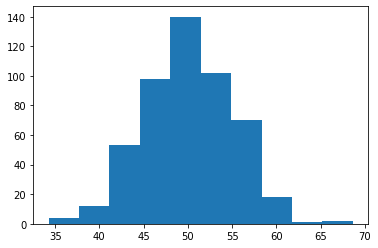

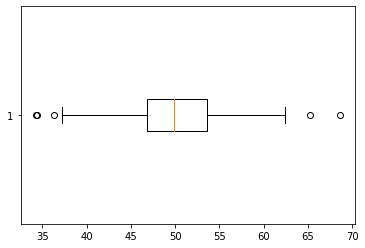

In [2]:
from matplotlib import pyplot
# Qualitative assessment: Visual inspection of histogram
# histogram
pyplot.hist(myData)
pyplot.show()

pyplot.boxplot(myData, vert=False)
pyplot.show()

In [3]:
# compute sample mean and standard deviation
# then calculate the cut-off for identifying outliers as more than 3 standard deviations from the mean.

# calculate summary statistics
data_mean, data_std = mean(myData), std(myData)

# identify outliers
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off

#identify outliers as those examples that fall outside of the defined lower and upper limits.
outliers = [x for x in myData if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))


# Alternately, we can filter out those values from the sample that are not 
# within the defined limits.
# remove outliers
outliers_removed = [x for x in myData if x > lower and x < upper]

print('Non-outlier observations: %d' % len(outliers_removed))

Identified outliers: 4
Non-outlier observations: 496


In [5]:
# Inter-Quartile Range (IQR) can be used to identify outliers by 
# defining limits on the sample values that are a factor k of the 
# IQR below the 25th percentile or above the 75th percentile. 
# The common value for the factor k is the value 1.5. 
# A factor k of 3 or more can be used to identify values that are 
# extreme outliers or “far outs” when described in the context of 
# box and whisker plots.

# On a box and whisker plot, these limits are drawn as fences on 
# the whiskers (or the lines) that are drawn from the box. 
# Values that fall outside of these values are drawn as dots.
# identify outliers with interquartile range
from numpy.random import seed
from numpy.random import randn
from numpy import percentile

# calculate interquartile range
q25, q75 = percentile(myData, 25), percentile(myData, 75)
iqr = q75 - q25

# calculate the cutoff for outliers as 1.5 times the IQR and 
# subtract this cut-off from the 25th percentile and add it 
# to the 75th percentile to give the actual limits on the data.
# calculate the outlier cutoff
cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off

# Use these limits to identify the outlier values.
outliers = [x for x in myData if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))

# Use the limits to filter out the outliers from the dataset.
# remove outliers
outliers_removed = [x for x in myData if x > lower and x < upper]
print('Non-outlier observations: %d' % len(outliers_removed))

Identified outliers: 5
Non-outlier observations: 495
